In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import mxnet as mx

#help(mx.sym.HEATMap)

context=mx.cpu()
import numpy as np
a=np.array([[ 129.75,  138.  ,  103.5 ,  157.5 ,  141.  ,  159.75,  154.5 ,
         114.75,  105.75,  141.75,  102.  ,  133.5 ,   93. ,250 ],
       [  66.75,  103.5 ,   97.5 ,  147.  ,  148.5 ,  113.25,  122.25,
         169.5 ,  179.25,  253.5 ,  255.  ,  322.5 ,  319.5,250 ],
           [1,1,1,1,1,1,1,1,1,1,1,1,1,1]],dtype=np.float32)
b=np.array([[ 129.75,  138.  ,  103.5 ,  157.5 ,  141.  ,  159.75,  154.5 ,
         114.75,  105.75,  141.75,  102.  ,  133.5 ,   93. ,250 ],
       [  66.75,  103.5 ,   97.5 ,  147.  ,  148.5 ,  113.25,  122.25,
         169.5 ,  179.25,  253.5 ,  255.  ,  322.5 ,  319.5,250 ],
           [1,1,1,1,1,1,1,1,1,1,1,1,1,1]],dtype=np.float32)-np.array([[20],[20],[0]])
print a.max(axis=1)
a=a.transpose((1,0)).reshape((1,42))
b=b.transpose((1,0)).reshape((1,42))
pose=np.zeros((2,43),dtype=np.float32)
pose[0,1:]=a
pose[0,0]=0
pose[1,1:]=b
pose[1,0]=0
pose=mx.nd.array(pose,context)
print pose.shape
print pose.asnumpy()
f=mx.nd.HEATMap(pose,output_shape=(400,200),sigma=16.0,num_parts=14,batch_size=1)

[ 250.   322.5    1. ]
(2L, 43L)
[[   0.    129.75   66.75    1.    138.    103.5     1.    103.5    97.5
     1.    157.5   147.      1.    141.    148.5     1.    159.75  113.25
     1.    154.5   122.25    1.    114.75  169.5     1.    105.75  179.25
     1.    141.75  253.5     1.    102.    255.      1.    133.5   322.5
     1.     93.    319.5     1.    250.    250.      1.  ]
 [   0.    109.75   46.75    1.    118.     83.5     1.     83.5    77.5
     1.    137.5   127.      1.    121.    128.5     1.    139.75   93.25
     1.    134.5   102.25    1.     94.75  149.5     1.     85.75  159.25
     1.    121.75  233.5     1.     82.    235.      1.    113.5   302.5
     1.     73.    299.5     1.    230.    230.      1.  ]]


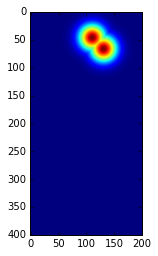

In [4]:
data=f[0].asnumpy()
plate=data[0]
#data=data.sum(axis=0)
plt.imshow(plate)
plt.show()


(400L, 200L) 3.49829


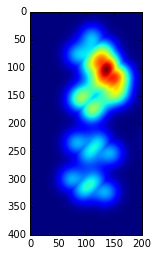

In [9]:
poses=mx.sym.Variable('poses')
f=mx.sym.HEATMap(poses=poses,output_shape=(400,200),sigma=8.0,num_parts=14,batch_size=1)
exc=f.bind(context,args=[pose])
data=exc.outputs[0][0].asnumpy()
data=data.sum(axis=0)
print data.shape,data.max()
plt.imshow(data)
plt.show()


In [10]:
exc.forward()

[<NDArray 1x14x400x200 @gpu(0)>]

(400L, 200L) 1.0


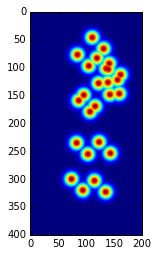

In [11]:
data=exc.outputs[0][0].asnumpy()
data=data.max(axis=0)
print data.shape,data.max()
plt.imshow(data)
plt.show()

In [6]:
print data

[[  9.80908925e-45   3.36311631e-44   1.21912966e-43 ...,   3.45055928e-31
    1.19714848e-31   4.08903468e-32]
 [  3.08285662e-44   1.12103877e-43   4.04975256e-43 ...,   9.71520878e-31
    3.37062708e-31   1.15128646e-31]
 [  1.00893489e-43   3.68541496e-43   1.32702965e-42 ...,   2.69295393e-30
    9.34302470e-31   3.19124570e-31]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.07107230e-33
    1.12978433e-33   4.09180813e-34]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   9.51373863e-34
    3.49990884e-34   1.26758297e-34]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.90152620e-34
    1.06741178e-34   3.86590934e-35]]
